In [1]:
# imports
import os, sys, pathlib
root = pathlib.Path.cwd()
# Ensure sys.path contains the directory that holds the PLD_subsampling/ package directory
if root.name == "PLD_subsampling" and (root / "__init__.py").exists():
    # Notebook opened from inside the package dir → add parent
    sys.path.insert(0, str(root.parent))
elif (root / "PLD_subsampling").exists():
    # Notebook opened from project root → add root
    sys.path.insert(0, str(root))
elif (root.parent / "PLD_subsampling").exists():
    sys.path.insert(0, str(root.parent))

import numpy as np
from PLD_subsampling.testing.test_utils import run_multiple_experiments, run_experiment
from PLD_subsampling.testing.plot_utils import create_pmf_cdf_plot, create_epsilon_delta_plot, print_experiment_table
from PLD_subsampling.testing.analytic_Gaussian import Gaussian_epsilon_for_delta

# Run a single experiment ($\sigma=0.5$, $\lambda=0.1$, remove direction)

In [2]:
sigma = 0.5
q = 0.1
discretization = 1e-4
deltas = np.array([10 ** (-k) for k in range(2, 13)], dtype=float)
remove_direction = True
versions = run_experiment(sigma=sigma, sampling_prob=q, discretization=discretization, delta_values=deltas, remove_direction=remove_direction)


σ=0.5, q=0.1, disc=0.0001, dir=rem
Delta              TF_TF          TF_Our          GT_Our           GT_GT              GT 
------------------------------------------------------------------------------------------
1e-02           1.687417        1.634026        1.687509        1.687467        1.687418
1e-03           3.717417        3.711518        3.717516        3.717467        3.717417
1e-04           5.283274        5.282209        5.283373        5.283324        5.283274
1e-05           6.575540        6.575309        6.575640        6.575590        6.575540
1e-06           7.695081        7.695046        7.695182        7.695131        7.695081
1e-07           8.694717        8.694741        8.694821        8.694767        8.694717
1e-08           9.605343        9.605369        9.605431        9.605393        9.605344
1e-09          10.446687       10.446747       10.446802       10.446738       10.446688
1e-10          11.232199       11.232273       11.232325       11.23225

/var/folders/ql/wp0qmxh5457dhfv74pc954hh0000gn/T/ipykernel_76664/3025457165.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_cdf.show()


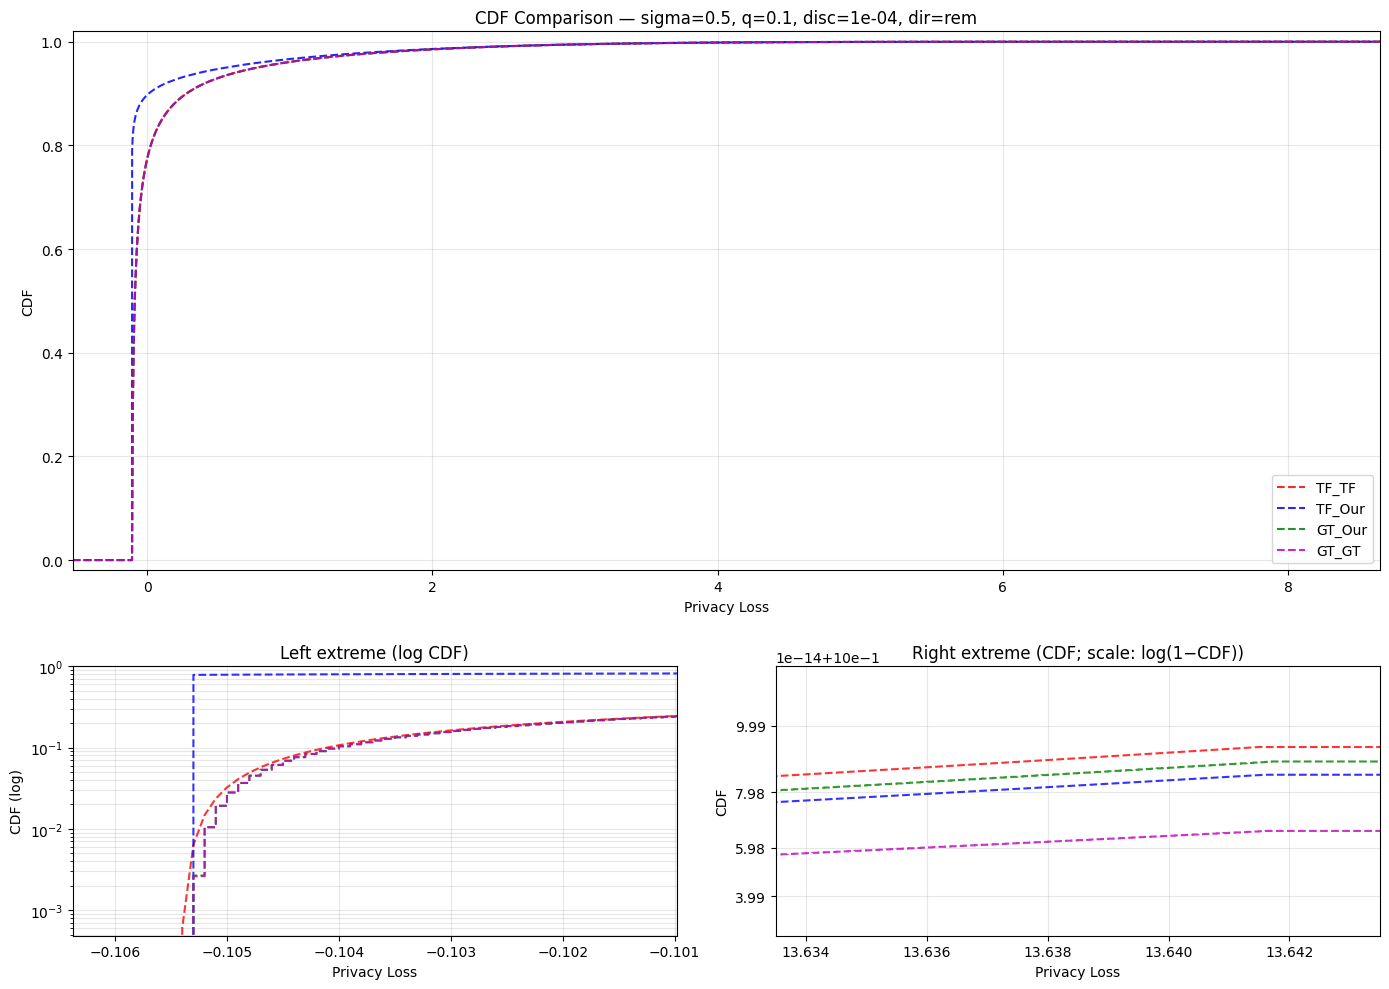

In [3]:
print(f"\nσ={sigma}, q={q}, disc={discretization:g}, dir={'rem' if remove_direction else 'add'}")
eps_GT = [
    Gaussian_epsilon_for_delta(sigma=sigma, sampling_prob=q, delta=float(d), remove_direction=remove_direction)
    for d in deltas
]
print_experiment_table(deltas, versions, eps_GT)

dir_text = 'rem' if remove_direction else 'add'
fig_cdf = create_pmf_cdf_plot(versions=versions, title_suffix=f'sigma={sigma}, q={q}, disc={discretization:.0e}, dir={dir_text}')
fig_cdf.show()

/var/folders/ql/wp0qmxh5457dhfv74pc954hh0000gn/T/ipykernel_76664/4034272254.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_eps.show()


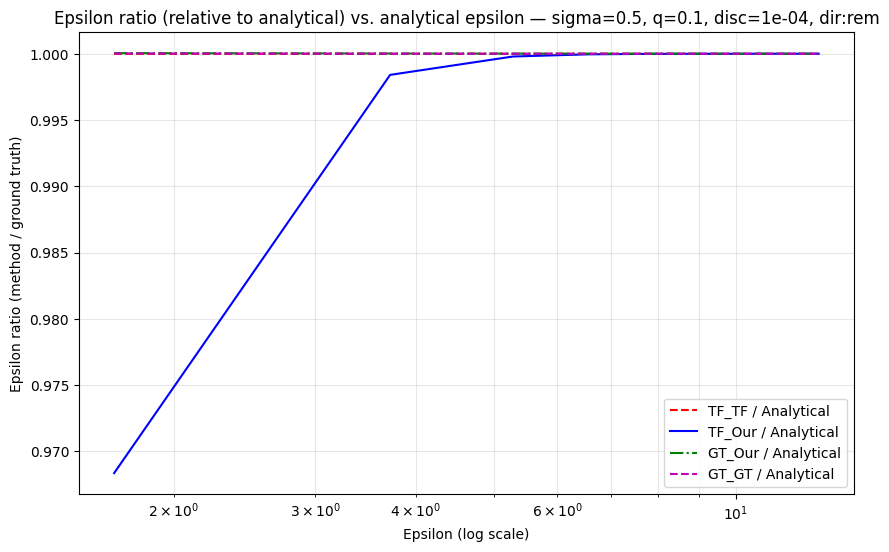

In [4]:
fig_eps = create_epsilon_delta_plot(delta_values=deltas, versions=versions, eps_GT=eps_GT, log_x_axis=True, log_y_axis=False, title_suffix=f'sigma={sigma}, q={q}, disc={discretization:.0e}, dir:{dir_text}')
fig_eps.show()

# Run many experiments  ($\sigma=2.0$, $\lambda=0.5$)

In [5]:
discretizations = [1e-4]
q_values = [0.5]
sigma_values = [2.0]
remove_directions = [True, False]
delta_values_arr = np.array([10 ** (-k) for k in range(2, 13)], dtype=float)
results = run_multiple_experiments(discretizations, q_values, sigma_values, remove_directions, delta_values_arr)

### Results for remove direction


σ=2.0, q=0.5, disc=0.0001, dir=rem
Delta              TF_TF          TF_Our          GT_Our           GT_GT              GT 
------------------------------------------------------------------------------------------
1e-02           0.450613        0.450663        0.450697        0.450663        0.450613
1e-03           0.796192        0.796241        0.796280        0.796242        0.796192
1e-04           1.091094        1.091144        1.091186        1.091144        1.091095
1e-05           1.353573        1.353623        1.353667        1.353623        1.353574
1e-06           1.592561        1.592611        1.592655        1.592611        1.592561
1e-07           1.813356        1.813406        1.813452        1.813406        1.813357
1e-08           2.019464        2.019515        2.019561        2.019514        2.019465
1e-09           2.213371        2.213420        2.213468        2.213421        2.213371
1e-10           2.396922        2.396973        2.397020        2.39697

/var/folders/ql/wp0qmxh5457dhfv74pc954hh0000gn/T/ipykernel_76664/49318847.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_cdf.show()


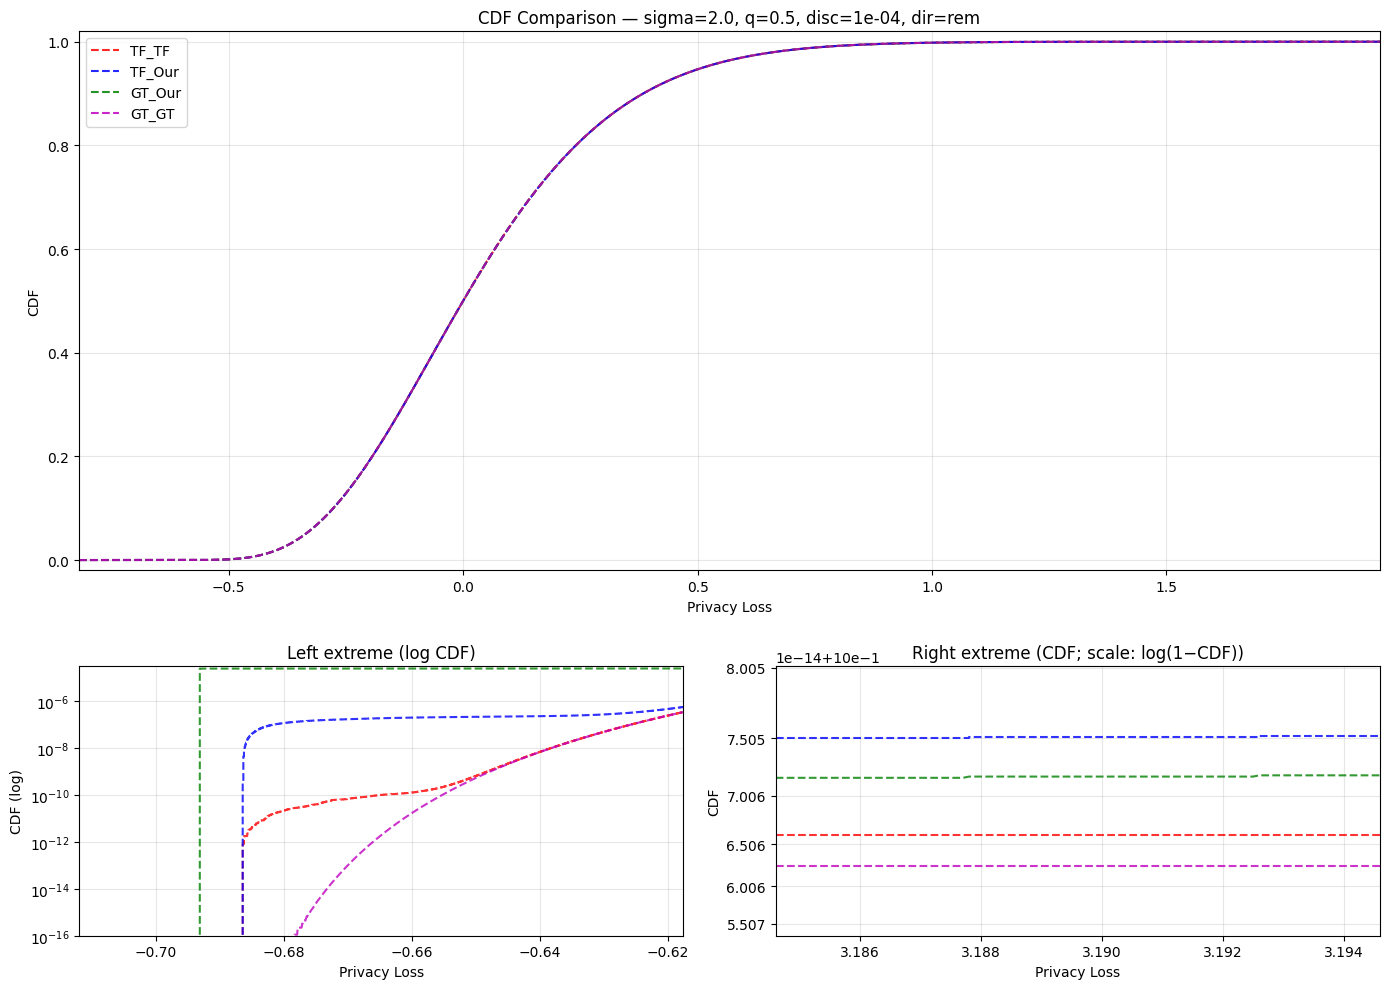

In [6]:
res = results[0]
sigma = res['sigma']; q = res['q']; discretization = res['discretization']; remove_direction = res['remove_direction']
versions = res['versions']; deltas = res['delta_values']
print(f"\nσ={sigma}, q={q}, disc={discretization:g}, dir={'rem' if remove_direction else 'add'}")
eps_GT = [
    Gaussian_epsilon_for_delta(sigma=sigma, sampling_prob=q, delta=float(d), remove_direction=remove_direction)
    for d in deltas
]
print_experiment_table(deltas, versions, eps_GT)

dir_text = 'rem' if remove_direction else 'add'
fig_cdf = create_pmf_cdf_plot(versions=versions, title_suffix=f'sigma={sigma}, q={q}, disc={discretization:.0e}, dir={dir_text}')
fig_cdf.show()

### Results for add direction


σ=2.0, q=0.5, disc=0.0001, dir=add
Delta              TF_TF          TF_Our          GT_Our           GT_GT              GT 
------------------------------------------------------------------------------------------
1e-02           0.277396        0.277446        0.277460        0.277446        0.277396
1e-03           0.407106        0.407156        0.407167        0.407156        0.407106
1e-04           0.483312        0.483362        0.483371        0.483362        0.483312
1e-05           0.533099        0.533150        0.533156        0.533149        0.533099
1e-06           0.567727        0.567777        0.567783        0.567777        0.567728
1e-07           0.592850        0.592900        0.592905        0.592900        0.592851
1e-08           0.611651        0.611701        0.611705        0.611701        0.611652
1e-09           0.626061        0.626111        0.626114        0.626111        0.626061
1e-10           0.637319        0.637369        0.637372        0.63736

/var/folders/ql/wp0qmxh5457dhfv74pc954hh0000gn/T/ipykernel_76664/440682718.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_cdf.show()


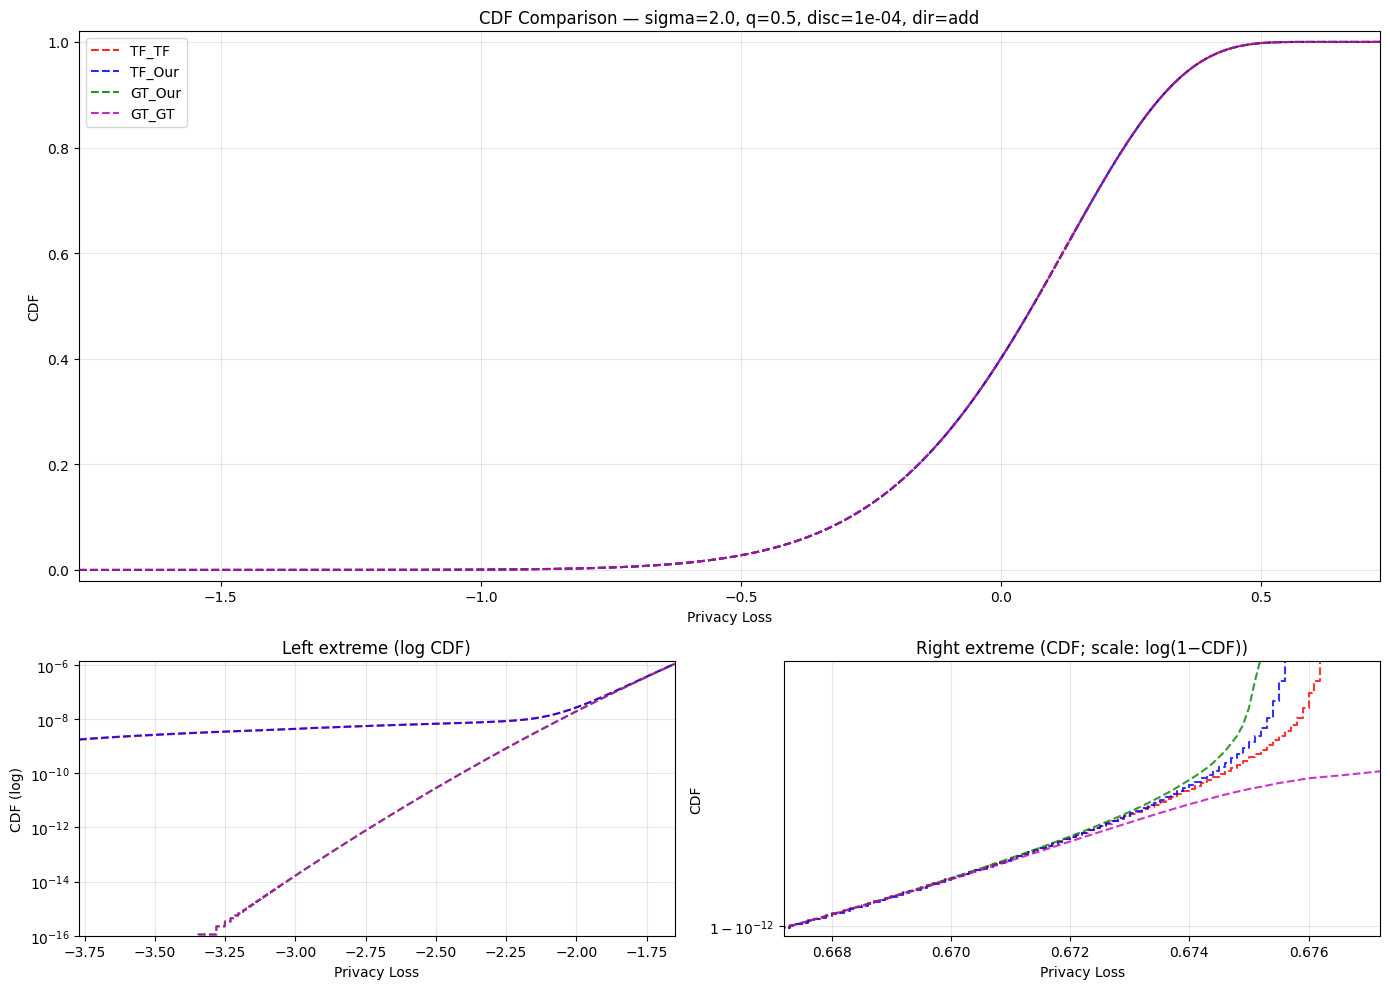

In [7]:
res = results[1]
sigma = res['sigma']; q = res['q']; discretization = res['discretization']; remove_direction = res['remove_direction']
versions = res['versions']; deltas = res['delta_values']
print(f"\nσ={sigma}, q={q}, disc={discretization:g}, dir={'rem' if remove_direction else 'add'}")
eps_GT = [
    Gaussian_epsilon_for_delta(sigma=sigma, sampling_prob=q, delta=float(d), remove_direction=remove_direction)
    for d in deltas
]
print_experiment_table(deltas, versions, eps_GT)

dir_text = 'rem' if remove_direction else 'add'
fig_cdf = create_pmf_cdf_plot(versions=versions, title_suffix=f'sigma={sigma}, q={q}, disc={discretization:.0e}, dir={dir_text}')
fig_cdf.show()

# Transform a dp_accounting PLD object

Delta                Our         Library              GT 
----------------------------------------------------------
1e-02           0.045112        0.045068        0.045068
1e-03           0.283046        0.283003        0.283003
1e-04           0.625960        0.625916        0.625917
1e-05           1.032836        1.032791        1.032791
1e-06           1.464706        1.464659        1.464659
1e-07           1.896832        1.896784        1.896784
1e-08           2.316874        2.316826        2.316826
1e-09           2.719903        2.719854        2.719855
1e-10           3.104732        3.104682        3.104683
1e-11           3.471876        3.471826        3.471827
1e-12           3.822532        3.822482        3.822482


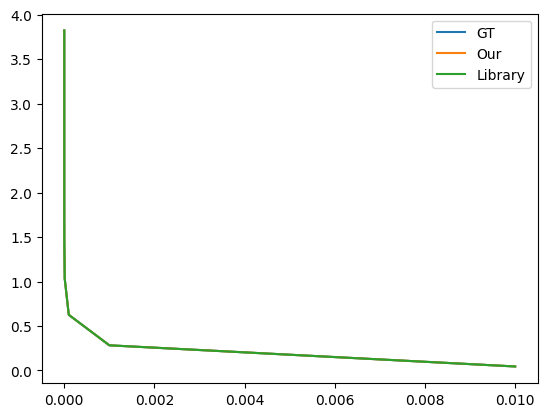

In [10]:
# Correct PLD→PLD transformation example (works without private attributes)
from PLD_subsampling.wrappers.dp_accounting_wrappers import (
    dp_accounting_pmf_to_loss_probs,
    amplify_pld_separate_directions,
)
from dp_accounting.pld import privacy_loss_distribution
import matplotlib.pyplot as plt
sigma = 1.0
q = 0.05
discretization = 1e-4

# Build a base (non-amplified) PrivacyLossDistribution
base_pld = privacy_loss_distribution.from_gaussian_mechanism(
    standard_deviation=sigma,
    sensitivity=1.0,
    value_discretization_interval=discretization,
    pessimistic_estimate=True,
)
# Amplify separately for remove/add
amplified_pld = amplify_pld_separate_directions(base_pld=base_pld, sampling_prob=q)
# Library-based transformation
lib_amplified_pld =  privacy_loss_distribution.from_gaussian_mechanism(
    standard_deviation=sigma,
    sensitivity=1.0,
    value_discretization_interval=discretization,
    sampling_prob=q,
    pessimistic_estimate=True,
)

#Compute epsilon for the delta array using the two amplified PLDs
eps_GT = [
    Gaussian_epsilon_for_delta(sigma=sigma, sampling_prob=q, delta=float(d), remove_direction=True)
    for d in deltas
]
eps_our_rem = [
    amplified_pld['pmf_remove'].get_epsilon_for_delta(d)
    for d in deltas
]
eps_our_add = [
    amplified_pld['pmf_add'].get_epsilon_for_delta(d)
    for d in deltas
]
eps_our = np.maximum(eps_our_rem, eps_our_add)
eps_lib = [
    lib_amplified_pld.get_epsilon_for_delta(d)
    for d in deltas
]

#create versions array for the two epsilon arrays and the gt which can be sent to the print function
versions = [
    {'name': 'Our', 'eps': eps_our},
    {'name': 'Library', 'eps': eps_lib}
]

print_experiment_table(deltas, versions, eps_GT)

#Plot the two epsilon arrays
plt.plot(deltas, eps_GT, label='GT')
plt.plot(deltas, eps_our, label='Our')
plt.plot(deltas, eps_lib, label='Library')
plt.legend()
plt.show()